# Парадигмы программирования

В течение этого учебного курса мы всё время создавали программный код.
При анализе данных мы писали всего лишь небольшие кусочки кода, и это называется "программирование по-маленькому". 
Но маленькими кусочками кода невозможно создать сложную программную систему, поэтому существует и ["программирование по-большому"](https://en.wikipedia.org/wiki/Programming_in_the_large_and_programming_in_the_small).


Когда нужно создавать программное обеспечение (ПО), которым будут *пользоваться* другие люди — **пользователи**, возникает много проблем. Во-первых, ПО на компьютере пользователя ещё нужно установить. Во-вторых, пользователям нужно помогать освоиться с работой программы, требуется поддержка (support). В-третьих, у них случаются неожиданные для программиста [баги](https://en.wikipedia.org/wiki/Software_bug) или же у программы могут найтись критические уязвимости, которые нужно срочно закрывать обновлениями. Если же ПО работает хорошо, то у пользователей появятся запросы на новую функциональность ПО.

Короче говоря, создавая программный продукт для живых людей, вы так или иначе подписываетесь на **длительное сопровождение программного кода**.

И вот для того, чтобы не утонуть в своём собственном коде, существуют [**методологии разработки ПО**](https://habr.com/ru/company/edison/blog/269789/), а также [**парадигмы программирования**](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D1%80%D0%B0%D0%B4%D0%B8%D0%B3%D0%BC%D0%B0_%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F). И если первые касаются организации рабочего процесса в целом, то парадигмы напрямую касаются того, *как программист пишет код* и *о чём ему нужно думать в процессе*.

## Парадигма

Слово παράδειγμα по-гречески значит «пример, модель, образец». В философии парадигма — это определённый набор шаблонов мышления, по которым выполняются последующие рассуждения, построения и обобщения. В науке пардигма — это безоговорочно принятая научным сообществом модель научной деятельности.
    
В программировании **парадигма** — это *совокупность идей и понятий, определяющих подход к программированию и стиль написания компьютерных программ*.
    
В отличие от научного сообщества, у программистов **нет общепринятой парадигмы**, возможно, потому, что программирование — это скорее ремесло и искусство, чем наука.

## Отсутствие парадигмы

Если большой код пишется без всякой структуры, то в нём невозможно разобраться. Назовём это "бесструктурным подходом".
лекция_11.png

## Структурная парадигма

Что же такое структурное программирование? Это − парадигма разработки программ с помощью представления их в виде иерархической структуры блоков. Идея структурного программирования появилась в 1970-х годах у учёного Эдсгера Вибе Дейкстры и была популяризована Никлаусом Виртом, создателем широко известного в школах языка Pascal.

В эту парадигму входит всего три пункта:

1. Любая программа состоит из трёх типов конструкций:
   1. последовательное исполнение;
   2. ветвление;
   3. цикл.
2. Логически целостные фрагменты программы оформляются в виде подпрограмм. В тексте основной программы вставляется инструкция вызова подпрограммы. После окончания подпрограммы исполнение продолжается с инструкции, следующей за командой вызова подпрограммы.
3. Разработка программы ведётся поэтапно методом «сверху вниз».

Первый пункт важен скорее не тем, что в нём есть, а тем, чего в нём нет: в нём нет оператора безусловного перехода `goto`. Именно это отличает структурное программирование от процедурного (процедурное программирование − синоним императивного).

Благодаря пункту два в языках высокого уровня появились новые синтаксические конструкции − функции и процедуры.

### Делегирование ответственности
Суть функций в том, что мы можем **делегировать ответственность за выполнение поздадачи** в определённую "коробочку" с кодом, а уже она сама отвечает за результат.
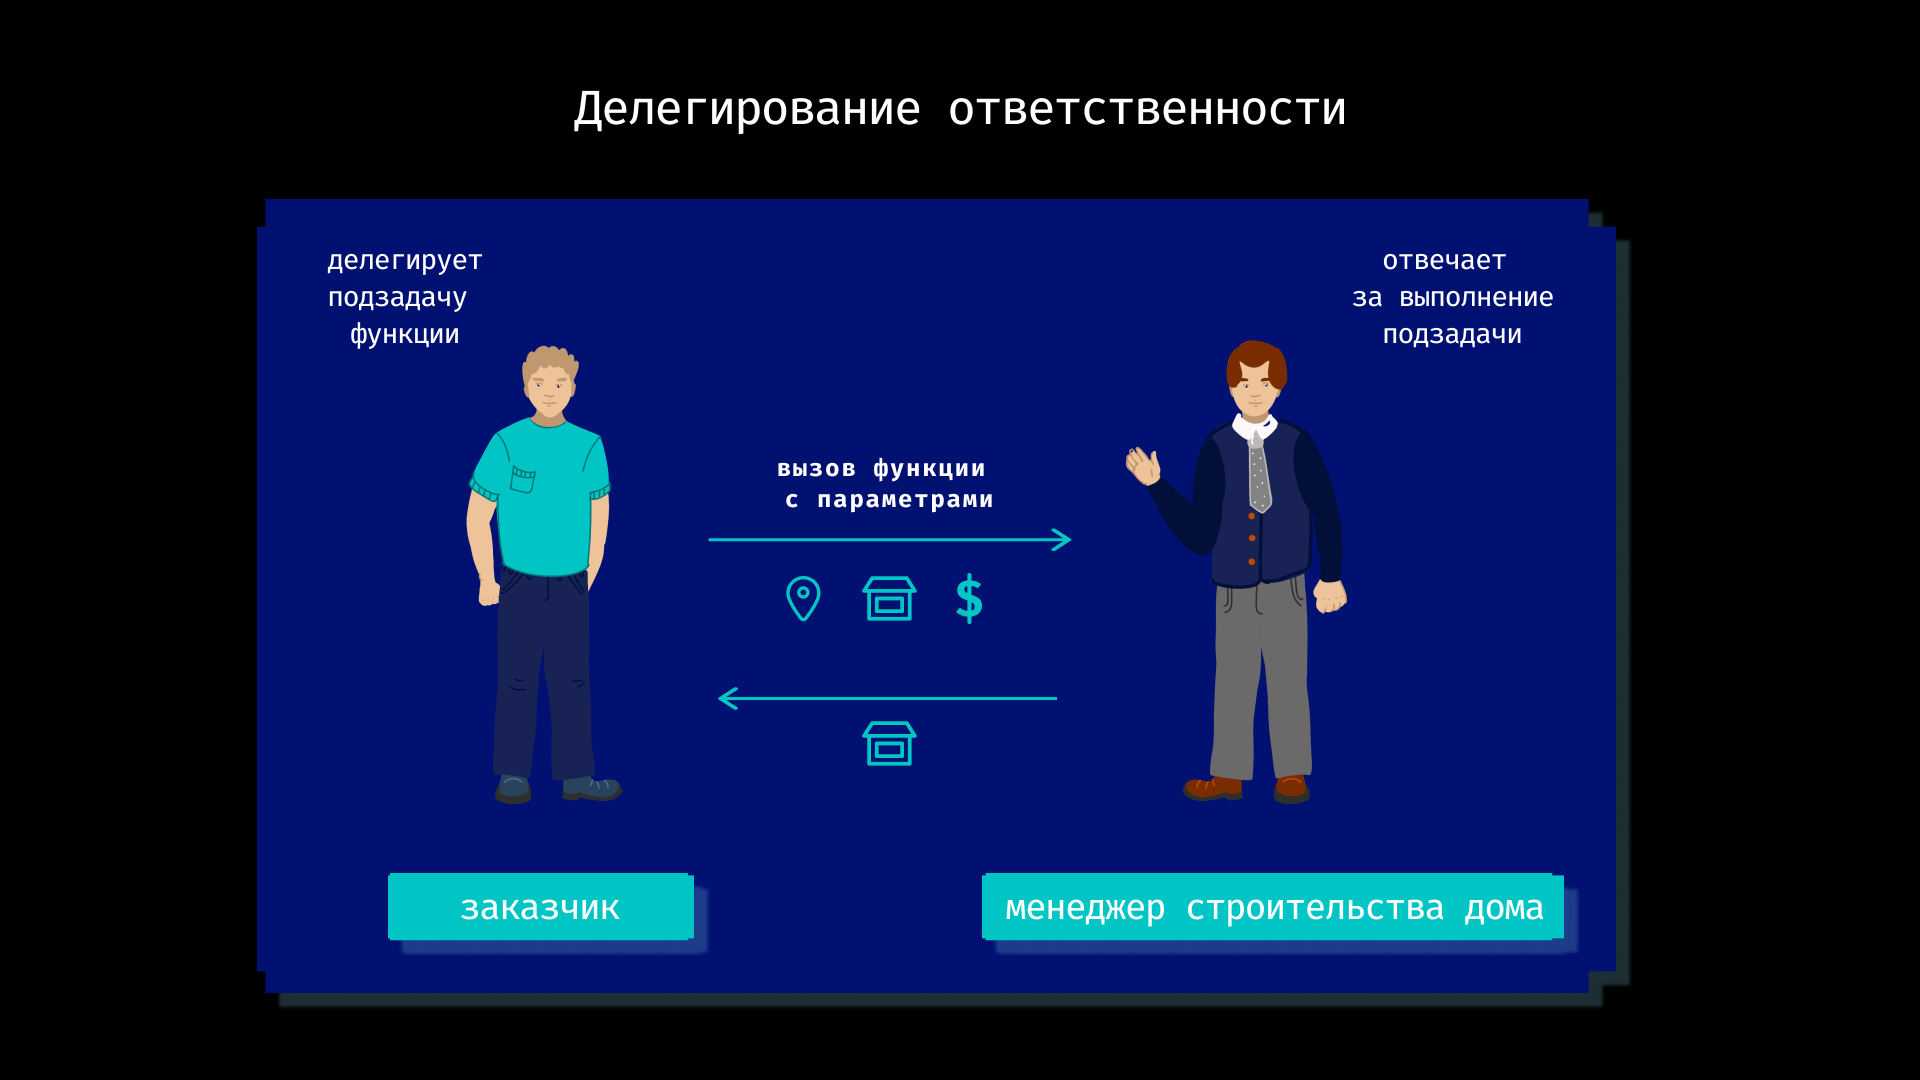




Далее функция "менеджер строительства" может делегировать подзадачи другим функциям, например, так:
лекция_11-3.png

Пункт три структурной парадигмы − самый важный, и он является её главной сутью. Чтобы лучше понять, что представляет собой метод «сверху вниз», рассмотрим конкретный пример.

### Практическое применение метода разработки "сверху-вниз"
Предположим, наша задача состоит в том, чтобы нарисовать на экране домик. Воспользуемся уже имеющейся у нас заготовкой программы с использованием библиотеки [PyGame](https://www.pygame.org):

```python
import pygame
from pygame.locals import *
from math import *

RED_COLOR = (255, 0, 0)
GREEN_COLOR = (0, 255, 0)
BLUE_COLOR = (0, 0, 255)
CYAN_COLOR = (0, 255, 255)
BLACK_COLOR = (0, 0, 0)

window = pygame.display.set_mode((600, 600))
pygame.display.set_caption("Нарисуйте мне дом! (А. Розенбаум)")

## Здесь можно вызывать функции рисования из модуля draw библиотеки Pygame

pygame.display.update()
going_to_quit = False
while not going_to_quit:
    for event in pygame.event.get():
        if (event.type == QUIT or
                event.type == KEYDOWN and event.key == K_ESCAPE):
            going_to_quit = True
pygame.quit()
```

Если её запустить, будет просто чёрное окошко.
В дальнейшем мы не будем воспроизводить весь этот код, а будем работать только над центральной частью, где стоит комментарий.

Безусловно, можно засучить рукава и начать рисовать элементы домика прямо в этом месте.
Но мы "размечтаемся", и просто вызовем функцию "*рисования всего*" `draw_image()`.
    
Вауля! Программа готова. Да, жаль только, что у нас нет такой функции, поэтому программа не работает. Что ж, придется ее написать.

Очевидно, если бы  функция `draw_image` существовала, ей бы обязательно потребовалось передать окно, в котором мы будем рисовать. Значит вызов должен быть таким:
```python
draw_image(window)
```


Но прежде чем писать функцию, нужно продумать ее интерфейс.

#### Проработка интерфейсов функций

Интерфейс функции — это описание того, как функция взаимодействует с окружением: какие параметры принимает и какой результат выдает (речь идет не только о возращаемом значении, но и о действиях, которые функция совершает "вовне" — например, как в нашем случае, вывод на экран изображения). Интерфейс задает стандарт, благодаря которому мы можем данной функцией пользоваться, даже не зная о том, как именно она устроена внутри.

В идеале (впрочем, на практике это не всегда удается) интерфейс функции нужно задать один раз и в дальнейшем не менять. Изменение внутренней логики работы функции без изменения ее интерфейса будет практически незаметным, а вот изменение интерфейса, который уже используется в разных частях программы, может быть довольно болезненным.

Поэтому стоит сразу сделать интерфейс функции достаточно гибким, чтобы он обеспечивал достаточную степень универсальности, но при этом не слишком сложным.


### Итеративная разработка

Структурное программирование прекрасно сочетается с ещё одним важным подходом — **итеративной разработкой**. Её суть в том, что программа делается *шагами*, **вкладами** (применяется термин **commit**), при этом каждый *коммит* является целостным, может быть запущен на исполнение и протестирован.
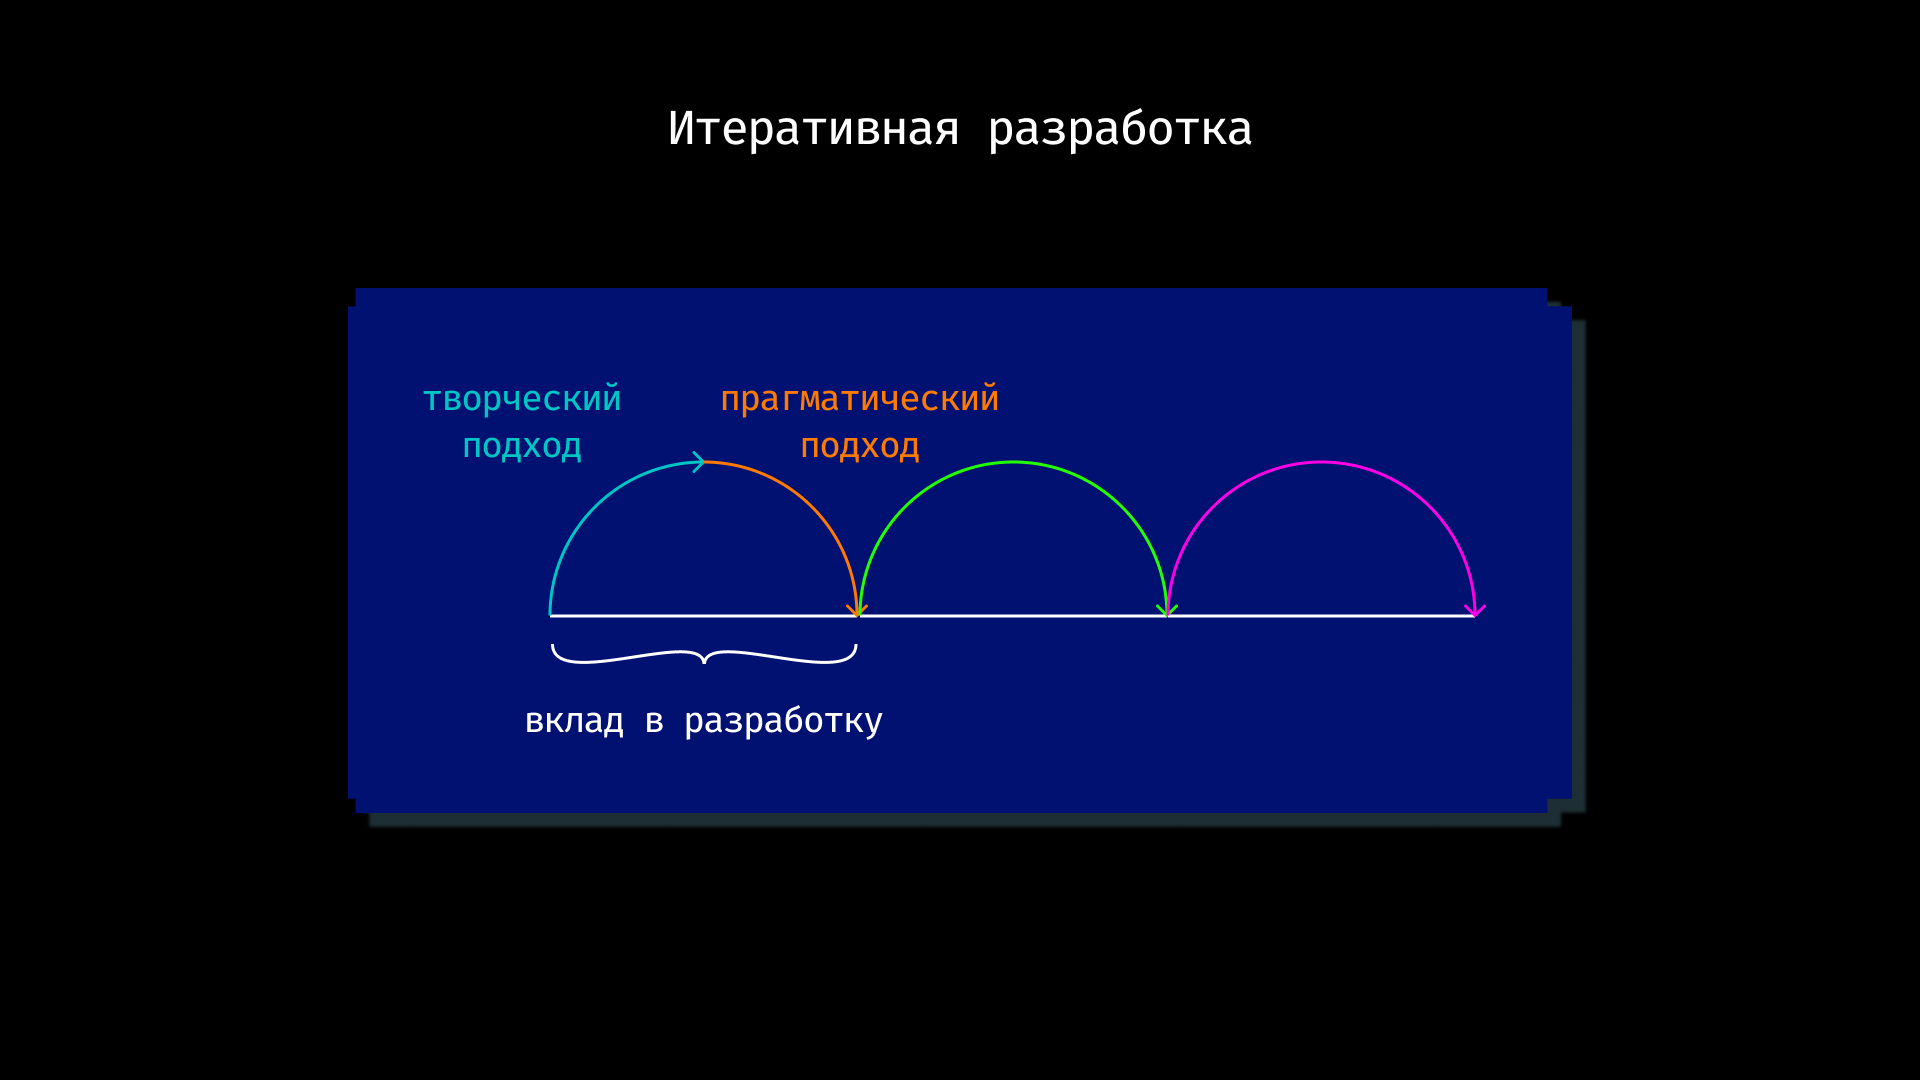

## Объектно-ориентированное программирование в Python
При процедурном программировании программа разбивается на части в соответствии с алгоритмом: каждая функция является составной частью алгоритма. При объектно-ориентированном программировании программа строится как совокупность взаимодействующих объектов. Что же такое объект? С точки зрения объектно-ориентированного подхода, объект - это нечто, обладающее состоянием и поведением. По сути, состояние - это данные, соответствующие объекту, например рост, вес и громкость гавканья собаки. Поведением называется набор операций, которые можно производить с объектом. Например, в случае с собакой: покормить, погладить, погулять. Эти операции, которые можно выполнять над объектом обычно называют методами (по крайней мере в контексте языка Python).

Часто приходится работать с объектами одной природы. Например, если у нас несколько собак, то у них у всех одинаковые наборы данных (хотя значения могут различаться) и одинаковые методы. Для определения такой "общей природы" вводятся классы. Класс, по сути, есть шаблон объектов - базовое состояние и общее поведение для всех объектов этого класса. Объекты одного класса называют экземплярами этого класса. Также, класс является типом данных для объектов.

В языке Python для определения класса используется оператор class. Рассмотрим следующий пример:

```python
class Dog:
    def say_gaw(self): # имя self для первого аргумента метода это общепринятое но не обязательное правило
        print('Gaw-gaw')

my_dog = Dog()
another_dog = Dog()
my_dog.say_gaw()      # вызовется функция Dog.say_gaw с параметром self = my_dog
another_dog.say_gaw()
```

Здесь мы описали класс Dog, который задает один метод. При описании методов класса первый аргумент есть ссылка на экземепляр, для которого этот метод вызывается. Далее, мы создали пару собак и позвали для каждой метод say_gaw. Для создания объектов используется имя класса со скобками. Методы вызываются через точку после имени объекта. Заметте, что первый аргумент метода - self - при вызове указывать не нужно, т.к. им становится сам объект (тот для которого зовем метод, его имя перед точкой).

Для хранения данных в объектах испальзуются атрибуты. Это те самые "свойства" объекта - рост, вес и т.п. Атрибуты могут иметь любой тип данных. Так же как и с обычными переменными в Python, объявлять атрибуты неким специальным образом не нужно, они появляются автоматически, при первом приваивании, следующим образом:

```python
class Dog:
    def say_gaw(self):
        if self.angry:
            print('GAW-GAW')
        else:
            print('Gaw-gaw')

    def ping(self):
        self.angry = True

    def feed(self, food_count):
        if food_count > 10:
            self.angry = False

my_dog = Dog()
my_dog.feed(20)
my_dog.say_gaw()      # напечатает Gaw-gaw
my_dog.ping()
my_dog.say_gaw()      # напечатает GAW-GAW
```

Часто для атрибутов хочется иметь некоторое начальное значение. В предыдущем примере есть проблема - если собака попытается гавкнуть до того как ее пнули или покормили, она навернется с ошибкой "AttributeError: 'Dog' object has no attribute 'angry'". Для решения этой проблемы используется метод со специальным именем - __init__, который вызывается автоматически при создании объекта:

```python
class Dog:
    def __init__(self):
        self.angry = False

    def say_gaw(self):
        if self.angry:
            print('GAW-GAW')
        else:
            print('Gaw-gaw')

my_dog = Dog()
my_dog.say_gaw()      # ошибки нет, напечатает Gaw-gaw
```

Метод __init__ называется конструктором. Собственно, конструктор зовется при выполнении конструкции вида ИмяКласса(), в нашем случае - Dog(). Аргументом self для конструктора становится вновь созданный объект. Конструктор, также как и обычные методы, может иметь дополнительные аргументы кроме self. Эти аргументы передаются при создании объекта, следующим образом:

```python
class Dog:
    def __init__(self, angry, count):
        self.angry = angry
        self.count = count

    def say_gaw(self):
        if self.angry:
            print('GAW-' * self.count)
        else:
            print('gaw-' * self.count)

my_dog = Dog(True, 3)
my_dog.say_gaw()      # ошибки нет, напечатает Gaw-gaw
```

Класс в Python также является объектом. Объект создается с помощью ключевого слова class, как в примерах выше. Таким образом, в предыдущем примере вызов my_dog.say_gaw() эквивалентен вызову Dog.say_gaw(my_dog). Разобраться, какой объект какому классу принадлежит помогут встроенные функции type и isinstance:

```python
>>> class A:
...     pass
...
>>> a = A()
>>> type(a)
<class '__main__.A'>
>>> type(A)
<class 'type'>
>>> type(type)
<class 'type'>
>>> type(1)
<class 'int'>
>>> type(int)
<class 'type'>
>>>
>>> isinstance(1, int)
True
>>> isinstance(1, A)
False
>>> isinstance(a, A)
True
>>> isinstance(type, type)
True
>>> isinstance(A, type)
True
```

Примечание: здесь был объявлен, в тестовых целях, пустой класс A - в нем нет никаких методов.

Нужно заметить также, что методы, которые класс определяет, не будут методами для него (как для объекта), а будут просто атрибутами типа function. Действительно, при вызове Dog.say_gaw(my_dog) никакой дополнительный self уже не передается, функция запускается в том виде, в котором мы ее написали. Это также можно показать следующим образом:
```python
>>> class A:
...     def f(self):
...         print('hello')
...
>>>
>>> type(A.f)
<class 'function'>
>>> a = A()
>>> type(a.f)
<class 'method'>
```

То есть, A.f - это функция, а a.f - метод. Метод здесь это объект, который содержит в себе ссылку на объект, за которым этот метод закреплен (в нашем случае это объект a) и ссылку на функцию, которую надо вызывать. Соответственно при вызове метод завет эту функцию, передавя ссылку на свой объект как первый аргумент и прокидывая остальные аргументы.
```python
>>> m = a.f
>>> m is A.f
False
>>> m.__func__ is A.f
True
>>> m.__self__ is a
True
>>> m.__func__(m.__self__)
hello
>>> m()
hello
>>> a.f()
hello
>>> A.f(a)
hello
```
### Стандартные методы

Кроме __init__ есть и другие стандартные методы, которые можно определить в описании класса.

Метод __repr__ должен возвращать текстовую строку, содержащую код (на языке Python), создающую объект, равный данному. Естественно, метод __repr__ должен содержать вызов конструктора, которому передаются в качестве параметров все строки исходного объекта, то есть он должен возвращать строку вида "Person('Иванов', 5)"

Пример метода __repr__ (для экономии места опустим описание конструктора __init__):
```python
class Dog:
    def __repr__(self):
        return "Dog('" + self.angry + "', " + self.count + ")"
```

Таким образом, метод __repr__ возвращает строку с описанием объекта, которое может быть воспринято итерпретатором языка Питон.

Метод __str__ возвращает строку, являющуюся описанием объекта в том виде, в котором его удобно будет воспринимать человеку. Здесь не нужно выводить имя конструктора, можно, например, просто вернуть строку с содержимым всех полей:
```python
class Dog
    def __str__(self):
        return self.name + ' ' + str(self.score)
```

Метод __str__ будет вызываться, когда вызывается функция str от данного объекта, например, str(Vasya). То есть создавая метод __str__ вы даете указание Питону, как преобразовывать данный объект к типу str.

Поскольку функция print использует именно функцию str для вывода объекта на экран, то определение метода __str__ позволит выводить объекты на экран удобным способом: при помощи print.
